In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Parametros financieros

In [239]:
monto_inicial = 1_000_000
tasa_anual = 0.1035
meses = 12
tasa_mensual = (1 + tasa_anual) ** (1/12) - 1
tasa_diaria = (1 + tasa_anual) ** (1/365) - 1
print(f"Tasa mensual compuesta: {tasa_mensual:.4%}")
print(f"Tasa diaria compuesta: {tasa_diaria:.4%}")

Tasa mensual compuesta: 0.8241%
Tasa diaria compuesta: 0.0270%


### Simulación de la progresión del ahorro

In [240]:
capital = [monto_inicial]

# Calculo con interes diarios
"""
for i in range(0, meses):
    crecimiento = 0
    for j in range(0,30):
        crecimiento += capital[i] * tasa_diaria
    capital.append(capital[i] + crecimiento)


"""
# Calculo con interes mensules

for i in range(0, meses):
    crecimiento = capital[i] * tasa_mensual
    capital.append(capital[i] + crecimiento)

df = pd.DataFrame({
    "Mes": np.arange(0, meses + 1),
    "Capital": capital
})
# Calculamos métricas adicionales
df["Interes_Generado"] = df["Capital"].diff().fillna(0)
df["Rendimiento_Acumulado_%"] = (df["Capital"] / monto_inicial - 1) * 100

### Resultados simulados

In [241]:
monto_final = df["Capital"].iloc[-1]
interes_generados = df["Interes_Generado"].sum()
rendimiento_total = ((monto_final / monto_inicial ) - 1) * 100

print(f"Monto Final: ${monto_final:,.2f}")
print(f"Interés Generado: ${interes_generados:,.2f}")
print(f"Rendimiento Total: {rendimiento_total:.2f}%")

Monto Final: $1,103,500.00
Interés Generado: $103,500.00
Rendimiento Total: 10.35%


In [242]:
df.tail()

,Mes,Capital,Interes_Generado,Rendimiento_Acumulado_%
8,8,1.067861e+06,8728.334016,6.786141
9,9,1.076662e+06,8800.264368,7.666167
10,10,1.085534e+06,8872.787499,8.553446
11,11,1.094480e+06,8945.908294,9.448037
12,12,1.103500e+06,9019.631680,10.350000


# Graficos

### Grafico: Crecimiento del capital

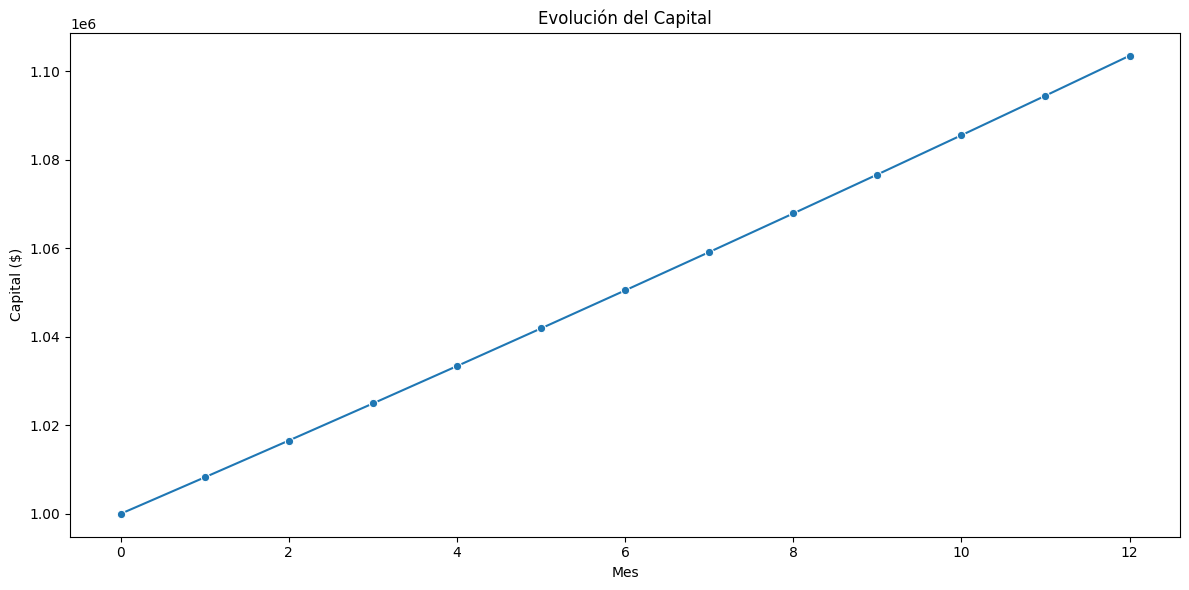

In [243]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Mes", y="Capital", marker="o")

plt.title("Evolución del Capital")
plt.xlabel("Mes")
plt.ylabel("Capital ($)")
plt.tight_layout()
plt.show()

### Grafico: Interes generado por mes

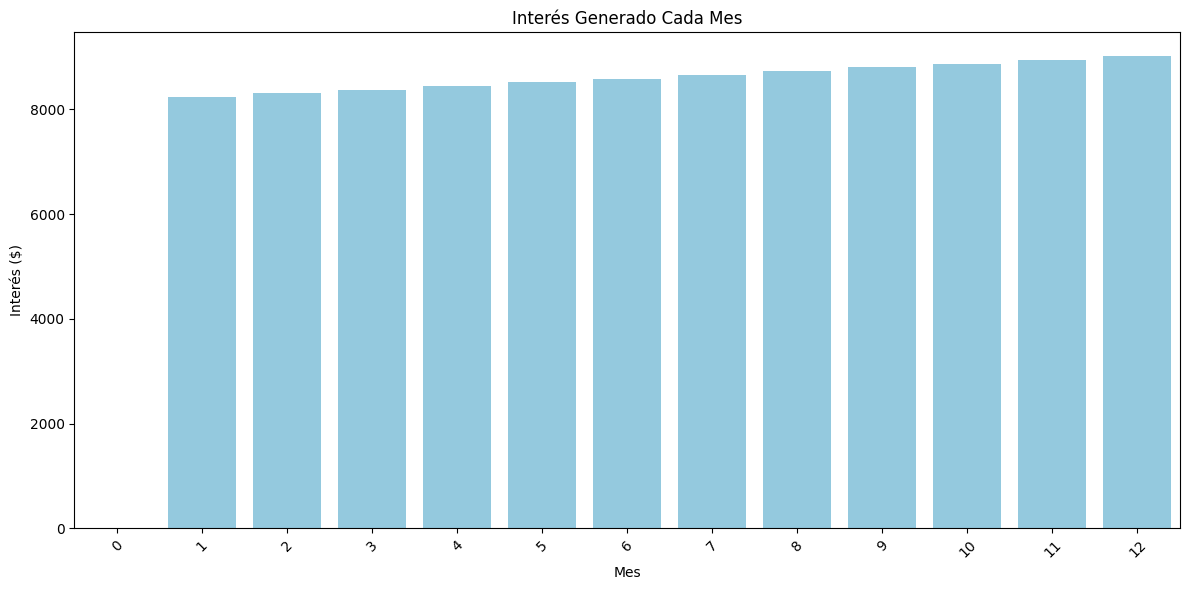

In [244]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Mes", y="Interes_Generado", color="skyblue")

plt.title("Interés Generado Cada Mes")
plt.xlabel("Mes")
plt.ylabel("Interés ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grafico: Rendimiento acumulado

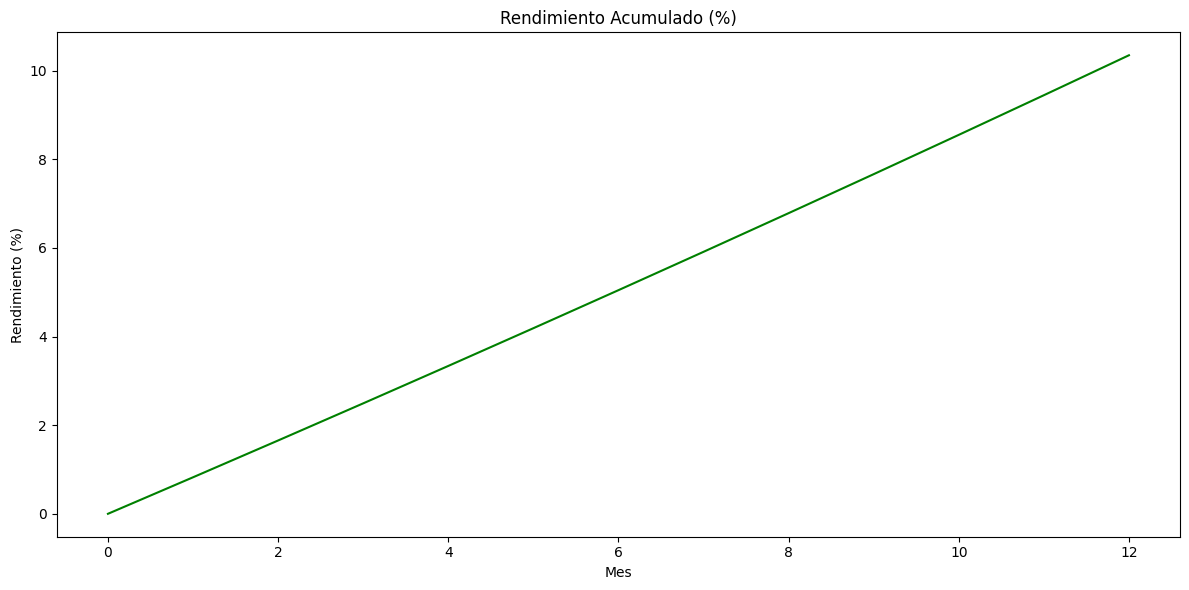

In [245]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Mes", y="Rendimiento_Acumulado_%", color="green")

plt.title("Rendimiento Acumulado (%)")
plt.xlabel("Mes")
plt.ylabel("Rendimiento (%)")
plt.tight_layout()
plt.show()